In [4]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA


- --
# 시계열 데이터 예측
* 전통적인 방법으로 시계열 데이터를 예측할 때는 중요한 전제조건의 하나로 시계열 데이터가 정상성(stationary)을 가져야 한다. <br> 정상성을 가진다는 것은 데이터에 trend, cycle, seasonality 가 없는 데이터를 말한다. 일반적인 주가 데이터의 경우 정상성을 가지지 않는 경우가 많다.

# 정상성을 판단하는 법 - ADF, KPSS 등이 사용된다.

### ADF test  <br> H0 : 단위근이 존재한다. 즉 정상성에 의심이 간다. <br>H1 : 단위근이 존재하지 않는다. 즉, 정상성이 존재한다.
### KPSS test ~

- --
# 정상성을 가지는 데이터의 사례
* 저희가 생각해본 정상성을 가지는 데이터는 무작위로 추출한 데이터입니다.

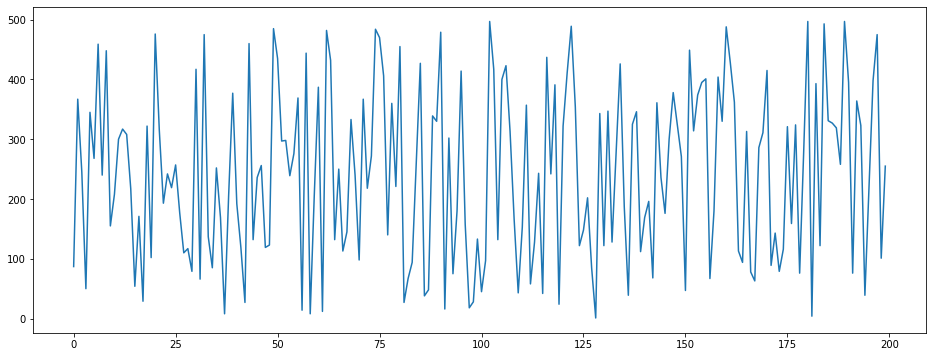

In [23]:
num = np.random.randint(500, size=200) # 무작위로 1 ~ 500 사이의 정수 중 200개를 추출해보았다.
result = adfuller(num)

plt.rcParams['figure.figsize'] = (16,6)
plt.plot(num) # line plot
plt.show()

In [24]:
print('ADF Statistics: %f' % result[0]) # p-value 0.05 를 넘으면 데이터의 정상성이 없다. 해결책이 차분이다.
print('p-value: %f'% result[1]) 
print('Critical values:')
for key,value in result[4].items(): # ADF의 p-value 가 0.0000 이기 떄문에 귀무가설을 기각해 데이터가 정상성을 가진다는것을 판단할 수 있다.
    print('\t%s %.3f' %(key,value))

ADF Statistics: -14.609542
p-value: 0.000000
Critical values:
	1% -3.464
	5% -2.876
	10% -2.575


- --
# DATA DOWNLOAD 

In [17]:
df_TSLA = yf.download('TSLA', start='2017-01-01', end='2021-08-31')

df_TSLA.reset_index(inplace=True)
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'])

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

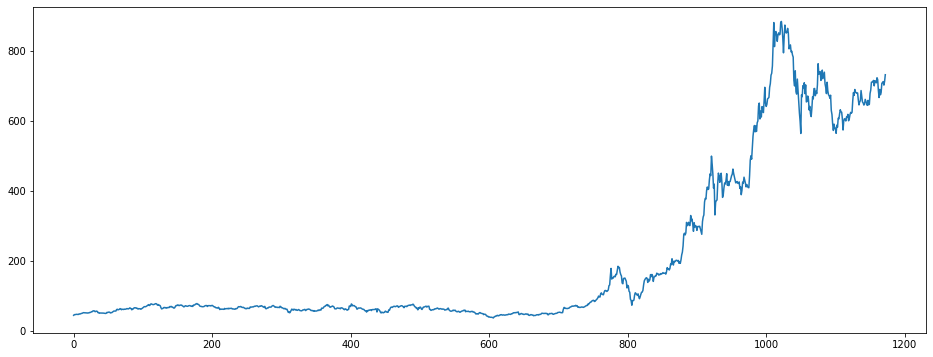

In [18]:
df_TSLA['Close'].plot()

- --
# Tesla의 종가(time series)의 정상성(stationary) 검정 - using Augmented Dicky Fuller test(ADF test)

##  ADF 간략한 설명
* ADF 는 정상성을 알아보기 위한 단위근 검정
### ADF 의 귀무가설과 대립가설 <br>귀무가설(null hypothesis, h0) 단위근이 존재한다. 즉 정상성에 의심이 간다. <br>대립가설(alternative hypothesis,h1)  단위근이 존재하지 않는다. 즉, 정상성이 존재한다.

In [20]:
Telsa_station = adfuller(df_TSLA['Close'])


(0.36761675361478857,
 0.9802426868374665,
 21,
 1151,
 {'1%': -3.436044130146462,
  '5%': -2.864054342974637,
  '10%': -2.568108697208109},
 8903.17946415629)

- --
# ARIMA MODEL 해석 

### order(p,d,q) p = AR parameter, d = difference(차분) q = MA parameter


* see more [ARIMA Method User Guide](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html)

### 정상성을 가지지 않아 오류가 발생하는 사례

In [27]:
model = ARIMA(df_AAPL['Close'], order = (1,0,1))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

- --
# 차분을 통해 정상성을 가지지 않는 데이터가 정상성을 가지게 한다.

In [11]:
model = ARIMA(df_AAPL['Close'], order = (1,1,1))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1172
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2177.312
Method:                       css-mle   S.D. of innovations              1.551
Date:                Thu, 02 Sep 2021   AIC                           4362.623
Time:                        00:14:43   BIC                           4382.889
Sample:                             1   HQIC                          4370.266
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1056      0.042      2.540      0.011       0.024       0.187
ar.L1.D.Close    -0.3395      0.253     -1.343      0.179      -0.835       0.156
ma.L1.D.Close     0.2291      0.262     

NameError: name 'plt' is not defined

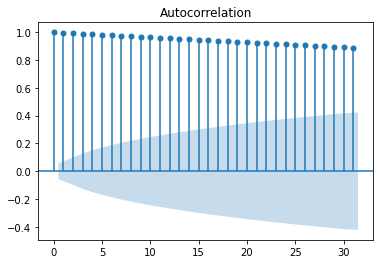

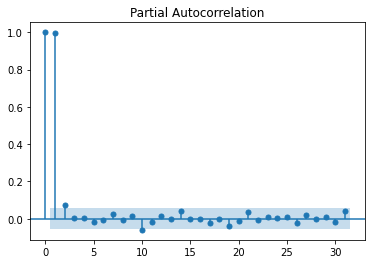

In [16]:
plot_acf(df_AAPL['Close'])
plot_pacf(df_AAPL['Close'])
plt.show()

In [47]:
acf(df['Close'].values)

array([1.        , 0.99605312, 0.99257901, 0.98910421, 0.98565133,
       0.98210978, 0.97853829, 0.97513305, 0.97165858, 0.96828446,
       0.96454135, 0.96075873, 0.95707744, 0.95339052, 0.94997055,
       0.94649087, 0.94303099, 0.93944177, 0.93589128, 0.93209828,
       0.92825544, 0.92465994, 0.92100769, 0.91746261, 0.9139376 ,
       0.91048844, 0.90689031, 0.90343884, 0.89995381, 0.89652536,
       0.89303974, 0.88982585, 0.88644962, 0.88285045, 0.87928963,
       0.87583127, 0.87245351, 0.86895364, 0.86562588, 0.86217239,
       0.85889295])

P + Q < 2 P*Q =0

In [59]:
pacf(df['Close'].values)

array([ 1.00000000e+00,  9.96902995e-01,  7.41700709e-02,  3.57820462e-03,
        1.82962360e-03, -1.60726443e-02, -9.27296365e-03,  2.39667003e-02,
       -9.54076107e-03,  1.31440050e-02, -6.00631550e-02, -1.85919645e-02,
        1.23004506e-02, -8.53845335e-04,  4.30305938e-02, -3.57952477e-03,
       -3.34468347e-03, -2.29939971e-02, -1.12619432e-03, -3.92636989e-02,
       -1.25826967e-02,  3.51005470e-02, -5.17994814e-03,  9.81587808e-03,
        4.11182388e-03,  8.84420147e-03, -2.29445075e-02,  2.16954216e-02,
       -2.37877370e-03,  1.01668234e-02, -1.70867374e-02,  4.18562780e-02,
       -2.82484025e-02, -4.32237948e-02, -1.58583021e-04,  1.84963190e-02,
        1.35197358e-02, -1.71904060e-02,  2.40680000e-02, -2.59003415e-02,
        2.08999898e-02])

In [50]:
for i in range(1, 40):
    ar =  df['Close'].autocorr(lag=i)
    print(ar)

0.9990233692360967
0.9982741402251792
0.9974690085053158
0.9967289497584706
0.995969546052449
0.995191450839613
0.9944998486242623
0.9936651611780255
0.9929224232528625
0.9920191383072668
0.9911371759636202
0.9902499404536341
0.9893501206693978
0.9885599994661683
0.9877005335314959
0.9868830804166097
0.9859393492349504
0.9850960900109563
0.9839999106494992
0.9828829426927057
0.981875399017585
0.9808349255207346
0.979898138023472
0.9789424512369507
0.978173033324435
0.9773843800330979
0.9767333054560638
0.9759481470627376
0.9751392052681113
0.9743101755293402
0.9735590702509579
0.972878104898382
0.9720914525107154
0.9713932336678837
0.9705901959285702
0.9698171175623647
0.968953915547792
0.9681715471097577
0.9673395820283983
